<a href="https://colab.research.google.com/github/DonRoboto/Financial_Models/blob/master/IPC_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

In [94]:
!pip install pandas-datareader

In [95]:
 !pip install stockstats 

In [96]:
!pip install pydataset

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as web
#import pandas.io.data as web
import datetime as dt
from pydataset import data
import statsmodels.api as sm 

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 

import matplotlib._color_data as mcd


# graficos incrustados
%matplotlib inline

# pandas solo 4 decimales
pd.set_option('precision', 4)

In [98]:
# Ejemplo serie de tiempo con Pandas
# Creando una serie de tiempo de las acciones de WFT desde yahoo finance
wft = web.DataReader("^MXX", 'yahoo', '2017-1-1', '2019-12-31')
wft.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,45792.4609,45593.2617,45642.8008,45695.1016,6765800,45695.1016
2017-01-03,46444.7188,45690.4609,45698.9297,46123.3594,164938800,46123.3594
2017-01-04,46587.7383,46068.8281,46123.3594,46587.7383,215385900,46587.7383
2017-01-05,46767.3711,46285.8789,46586.0312,46719.9883,237288300,46719.9883
2017-01-06,46731.8984,46027.1016,46721.6992,46071.5703,201371200,46071.5703


In [0]:
# filtrando sólo del 2016-02-04 al 2016-02-18
wft['2019-01-01':'2019-12-30']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,42328.5508,41436.4883,41550.7500,42271.1406,68115200,42271.1406
2019-01-03,42292.3906,41699.7812,42172.2617,42044.3203,113098700,42044.3203
2019-01-04,42661.8398,42024.7695,42024.7695,42455.1289,110987200,42455.1289
2019-01-07,42896.1094,42313.0586,42489.0508,42834.1992,142739600,42834.1992
2019-01-08,43582.1914,43024.5195,43264.1914,43542.8711,174362500,43542.8711
...,...,...,...,...,...,...
2019-12-23,44590.9297,44189.2383,44571.2617,44276.8516,92129000,44276.8516
2019-12-24,44298.9414,44108.4492,44275.7891,44157.9688,13691800,44157.9688
2019-12-26,44360.6211,44057.4883,44149.9688,44300.1719,32194100,44300.1719


In [0]:
# valores al 2016-02-16
wft.loc['2019-01-02']

High         4.2329e+04
Low          4.1436e+04
Open         4.1551e+04
Close        4.2271e+04
Volume       6.8115e+07
Adj Close    4.2271e+04
Name: 2019-01-02 00:00:00, dtype: float64

In [0]:
# valor de la columna Adj Close al 2016-2-16
wft['Adj Close']['2019-01-02']

42271.140625

In [0]:
# filtrando todo febrero de 2016
wft['2019-02']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-01,44226.1719,43679.3008,44095.4414,43738.2695,145312800,43738.2695
2019-02-05,44491.7500,43830.4688,43898.1094,44337.1016,143140100,44337.1016
2019-02-06,44495.0195,43808.8281,44391.7109,43855.7891,184307300,43855.7891
2019-02-07,44090.4883,43586.8711,43808.7812,43624.5508,156102100,43624.5508
2019-02-08,43620.2891,43116.5586,43576.6992,43180.4492,111612400,43180.4492
2019-02-11,43471.8711,43108.5000,43126.0391,43285.1719,100496900,43285.1719
2019-02-12,43616.0312,42970.1211,43328.4805,43113.7891,169619700,43113.7891
2019-02-13,43194.2500,42202.9609,43138.5117,42284.0586,195295700,42284.0586
2019-02-14,42780.8906,42066.0781,42364.9883,42725.2188,184916300,42725.2188


In [0]:
# Valores al cierre de cada mes.
wft.asfreq('M', method='ffill')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,47243.0703,46928.4805,47131.2305,47001.0586,215251100,47001.0586
2017-02-28,47378.0898,46692.4688,47352.4492,46856.7891,252313600,46856.7891
2017-03-31,48925.4414,48541.5586,48863.1289,48541.5586,242628600,48541.5586
2017-04-30,49478.2617,49151.8984,49444.9805,49261.3281,136204200,49261.3281
2017-05-31,49423.4102,48749.9609,49275.6289,48788.4414,326841000,48788.4414
2017-06-30,49901.5117,49204.7617,49255.0781,49857.4883,155618300,49857.4883
2017-07-31,51335.9883,50926.1289,51219.5781,51011.8711,213736100,51011.8711
2017-08-31,51232.4883,51034.2695,51155.5898,51210.4805,224059000,51210.4805
2017-09-30,50605.6016,50064.8203,50064.8203,50346.0586,149603900,50346.0586


In [0]:
# Valores al cierre de cada mes (días laborales).
wft.asfreq('BM')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,47243.0703,46928.4805,47131.2305,47001.0586,2.1525e+08,47001.0586
2017-02-28,47378.0898,46692.4688,47352.4492,46856.7891,2.5231e+08,46856.7891
2017-03-31,48925.4414,48541.5586,48863.1289,48541.5586,2.4263e+08,48541.5586
2017-04-28,49478.2617,49151.8984,49444.9805,49261.3281,1.3620e+08,49261.3281
2017-05-31,49423.4102,48749.9609,49275.6289,48788.4414,3.2684e+08,48788.4414
2017-06-30,49901.5117,49204.7617,49255.0781,49857.4883,1.5562e+08,49857.4883
2017-07-31,51335.9883,50926.1289,51219.5781,51011.8711,2.1374e+08,51011.8711
2017-08-31,51232.4883,51034.2695,51155.5898,51210.4805,2.2406e+08,51210.4805
2017-09-29,50605.6016,50064.8203,50064.8203,50346.0586,1.4960e+08,50346.0586


In [0]:
# valores al cierre de cada trimestre
wft.asfreq('BQ')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-31,48925.4414,48541.5586,48863.1289,48541.5586,2.4263e+08,48541.5586
2017-06-30,49901.5117,49204.7617,49255.0781,49857.4883,1.5562e+08,49857.4883
2017-09-29,50605.6016,50064.8203,50064.8203,50346.0586,1.4960e+08,50346.0586
2017-12-29,49388.9805,48874.1602,48880.3906,49354.4219,8.5909e+07,49354.4219
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-29,47705.5703,47021.7109,47025.6992,47663.1992,1.8600e+08,47663.1992
2018-09-28,49644.2383,49347.5195,49542.5117,49504.1602,1.3389e+08,49504.1602
2018-12-31,41723.6914,41421.0703,41461.6914,41640.2695,6.5622e+07,41640.2695
2019-03-29,43316.6719,42960.1484,43046.9219,43281.2812,2.0168e+08,43281.2812



##Desplazando los valores de la serie

Una operación común en los datos de series de tiempo es desplazar los valores hacia atrás y adelante en el tiempo, como por ejemplo para calcular el cambio porcentual de una muestra a otra. En Pandas podemos utilizar el método .shift().


In [0]:
# desplazando el 1 dia el valor de cierre
desplazado = wft['Adj Close'].shift(1)
desplazado[:5]

Date
2017-01-02           NaN
2017-01-03    45695.1016
2017-01-04    46123.3594
2017-01-05    46587.7383
2017-01-06    46719.9883
Name: Adj Close, dtype: float64

In [101]:
# calculando el porcentaje de variación del día.
variacion_diaria = wft['Adj Close'] / wft['Adj Close'].shift(1) - 1
wft['var_diaria'] = variacion_diaria
wft['var_diaria'][:5]

Date
2017-01-02       NaN
2017-01-03    0.0094
2017-01-04    0.0101
2017-01-05    0.0028
2017-01-06   -0.0139
Name: var_diaria, dtype: float64

In [0]:
# mismo resultado utilizando pct_change()
wft['Adj Close'].pct_change()[:5]

Date
2017-01-02       NaN
2017-01-03    0.0094
2017-01-04    0.0101
2017-01-05    0.0028
2017-01-06   -0.0139
Name: Adj Close, dtype: float64

In [0]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + wft['Adj Close'].pct_change()).cumprod()
wft['rend_diario'] = rendimiento_diario
wft['rend_diario'][:5]

Date
2017-01-02       NaN
2017-01-03    1.0094
2017-01-04    1.0195
2017-01-05    1.0224
2017-01-06    1.0082
Name: rend_diario, dtype: float64


##Visualizando las series de tiempo

Una operación fundamental para entender el comportamiento de una serie de tiempo y poder determinar si se trata de una serie estacionaria o no; es realizar gráficos de la misma. En Pandas esto lo podemos realizar en forma muy sencilla con el método .plot().


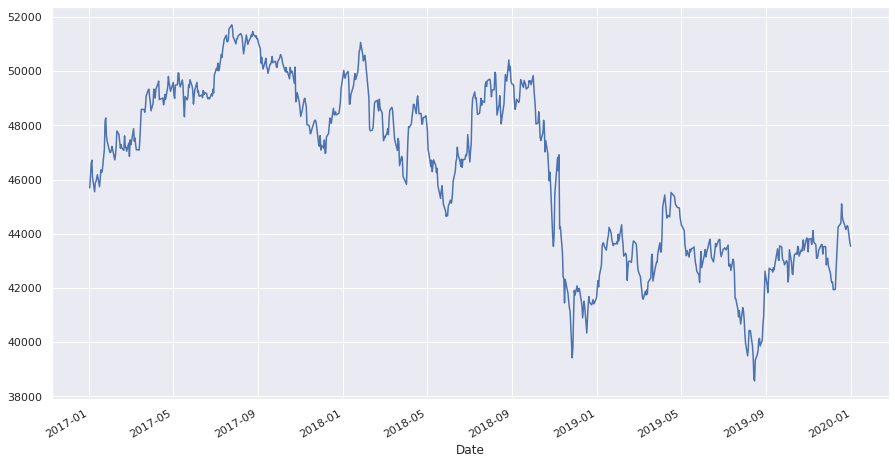

In [99]:
sns.set()

# graficando Adj Close
plot = wft['Adj Close'].plot(figsize=(15, 8))
plt.grid(True)

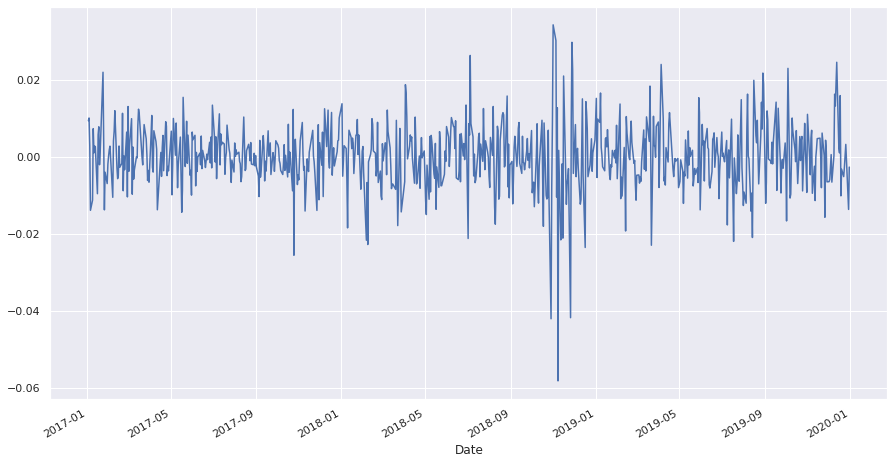

In [102]:
# graficando rendimiento diario
plot = wft['var_diaria'].plot(figsize=(15, 8))
plt.grid(True)

In [0]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
wft_ciclo, wft_tend = sm.tsa.filters.hpfilter(wft['Adj Close'], lamb=1600*3**4)
wft['Tendencia'] = wft_tend
wft['Ciclo'] = wft_ciclo

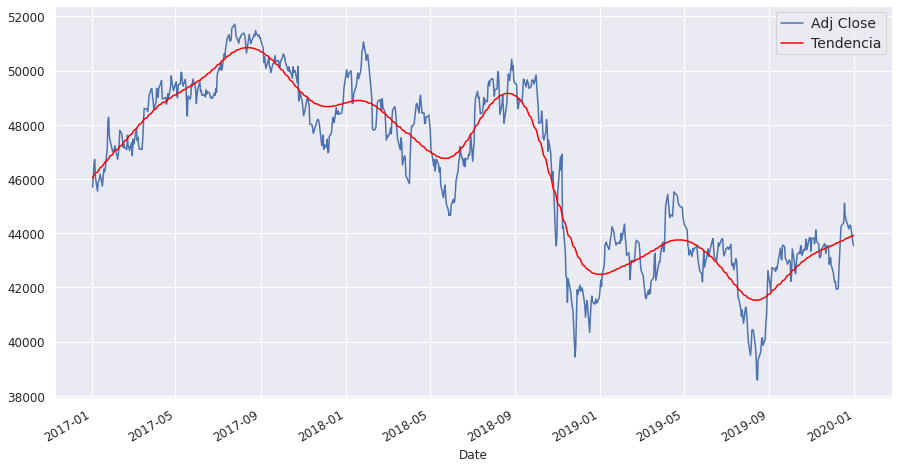

In [132]:
# graficando la variacion del precio real con la tendencia.
sns.set
wft[['Adj Close', 'Tendencia']].plot(figsize=(15, 8), fontsize=12, color=['C0', 'red']);
legend = plt.legend()
legend.prop.set_size(14);
plt.grid(True)


In [0]:
wft_ciclo_2, wft_tend_2 = sm.tsa.filters.hpfilter(wft['Ciclo'])
wft['Ciclo 2'] = wft_tend_2
wft['Ciclo_22'] = wft_ciclo_2

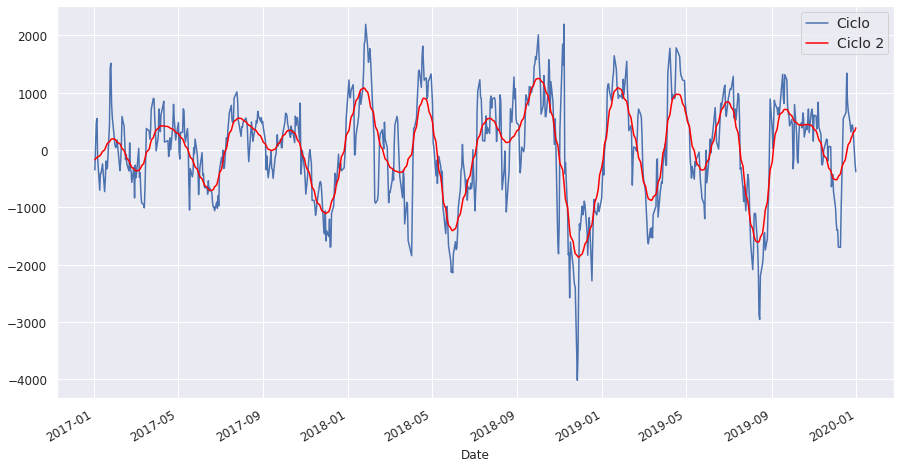

In [134]:
# graficando la variacion del precio real con la tendencia.
wft[['Ciclo', 'Ciclo 2']].plot(figsize=(15, 8), fontsize=12, color=['C0', 'red']);
legend = plt.legend()
legend.prop.set_size(14);
plt.grid(True)


##Promedios móviles y descomposición

Pandas también nos ofrece una serie de funciones para calcular estadísticas móviles, en ellas la función estadística se calcula sobre una ventana de datos representados por un determinado período de tiempo y luego se desplaza la ventana de datos por un intervalo especificado, calculando continuamente la estadística, siempre y cuando la ventana este dentro de las fechas de la serie de tiempo. El ejemplo más utilizado es el de media móvil, que se usa comúnmente en el análisis de series de tiempo financieras para suavizar las fluctuaciones a corto plazo y poner de relieve las tendencias a largo plazo en los datos.

Otra técnica interesante que podemos intentar también es la descomposición. Esta es una técnica que trata de descomponer una serie de tiempo en su tendencia, su estacionalidad y sus factores residuales. Statsmodels viene con una función de descomposición que nos facilita en sobremanera el trabajo. Veamos unos ejemplos.


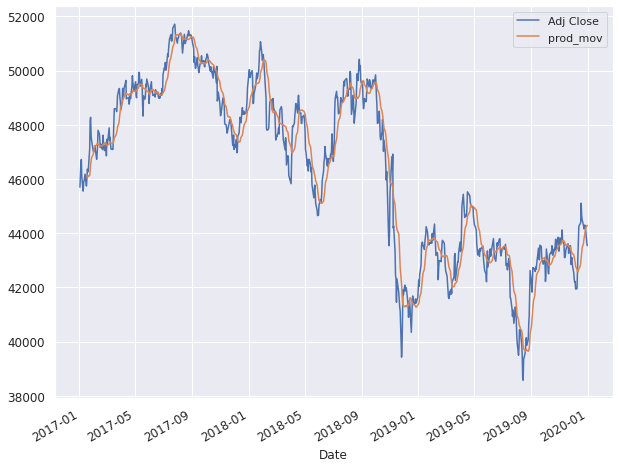

In [0]:
# Calculando promedios móviles cada 5 días
#wft_ma = pd.rolling_mean(wft['Adj Close'], 5)
#wft['prod_mov'] = wft_ma
#plot = wft[['Adj Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

wft_ma = pd.Series(wft['Adj Close']).rolling(window=12).mean()

#rolstd = pd.Series(wft['Adj Close']).rolling(window=12).std()

wft['prod_mov'] = wft_ma
plot = wft[['Adj Close', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)
plt.grid(True)

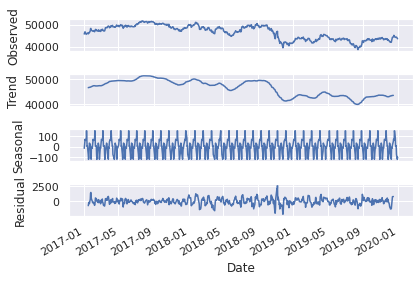

In [0]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(wft['Adj Close'],
                                                  model='additive', freq=20)  
fig = descomposicion.plot()


##Pronosticando la serie con ARIMA

Como podemos observar en los gráficos que realizamos anteriormente, el comportamiento de la serie de tiempo con la que estamos trabajando parece ser totalmente aleatorio y las medidas móviles que calculamos tampoco parecen ser de mucha utilidad para acercar la serie a un comportamiento estacionario. De todas formas podemos intentar aplicar un modelo ARIMA sobre la serie y ver que tan bien nos va con el pronostico del modelo. El modelo ARIMA es similar a una regresión estadística pero aplicando los conceptos de las series de tiempo; por tanto, los pronósticos del modelo vienen explicadas por los datos del pasado y no por variables independientes.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


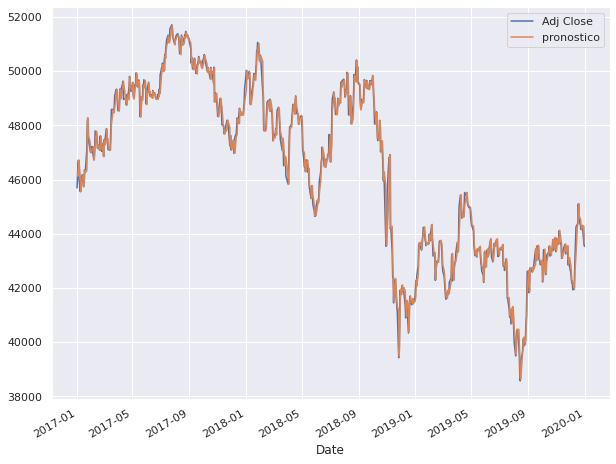

In [0]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(wft['Adj Close'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['Adj Close', 'pronostico']].plot(figsize=(10, 8))  

Aquí el modelo parece ser bastante efectivo, las líneas en el gráfico son muy similares. Pero para armar el modelo hemos utilizado el valor de cierre de la acción, y la variación de precio en el día a día es muy pequeña en comparación al precio absoluto. Lo que realmente nos interesa predecir es la variación diaria del precio de la acción, por lo tanto deberíamos armar el modelo utilizando la columna de variación diaria que calculamos previamente.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


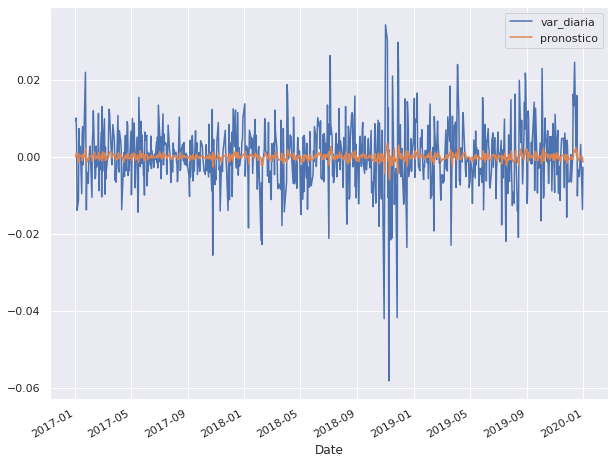

In [0]:
# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(wft['var_diaria'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
wft['pronostico'] = resultados.fittedvalues  
plot = wft[['var_diaria', 'pronostico']].plot(figsize=(10, 8)) 


En este gráfico podemos ver que es bastante obvio que el pronóstico esta muy lejos. Nuestro modelo predice variaciones muy pequeñas en comparación con lo que ocurre en la realidad del día a día. Este era un resultado esperado ya que solo aplicamos un modelo sencillo de promedios móviles a una serie no estacionaria; después de todo, si fuera tan fácil predecir el movimiento del mercado, todos seríamos millonarios!. No hay suficiente información en los días anteriores para poder predecir con exactitud lo que va a pasar al día siguiente.